In [58]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [59]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
# Load the data

path = "/home/guts/Documents/accel_data/2024-08-16.csv"
df = pd.read_csv(path)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df

# Data Preprocessing
df = df.set_index('Timestamp')
df = df.resample('1S').mean()
df = df.dropna()

# Scale the data using StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame()
df_scaled['Acceleration'] = df['Filtered x']
df_scaled


,Acceleration
Timestamp,
2024-08-16 00:00:00,-3.000132
2024-08-16 00:00:01,-1.740184
2024-08-16 00:00:02,-0.168390
2024-08-16 00:00:03,-1.258949
2024-08-16 00:00:05,-1.577977
...,...
2024-08-16 00:48:39,-3.667516
2024-08-16 00:48:40,0.386466
2024-08-16 00:48:41,1.107719


In [65]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_scaled)
df['Cluster'] = kmeans.labels_

# Count the number of data points in each cluster
cluster_counts = df['Cluster'].value_counts()
cluster_counts


Cluster
1    921
2    614
3    554
4    374
0    364
Name: count, dtype: int64

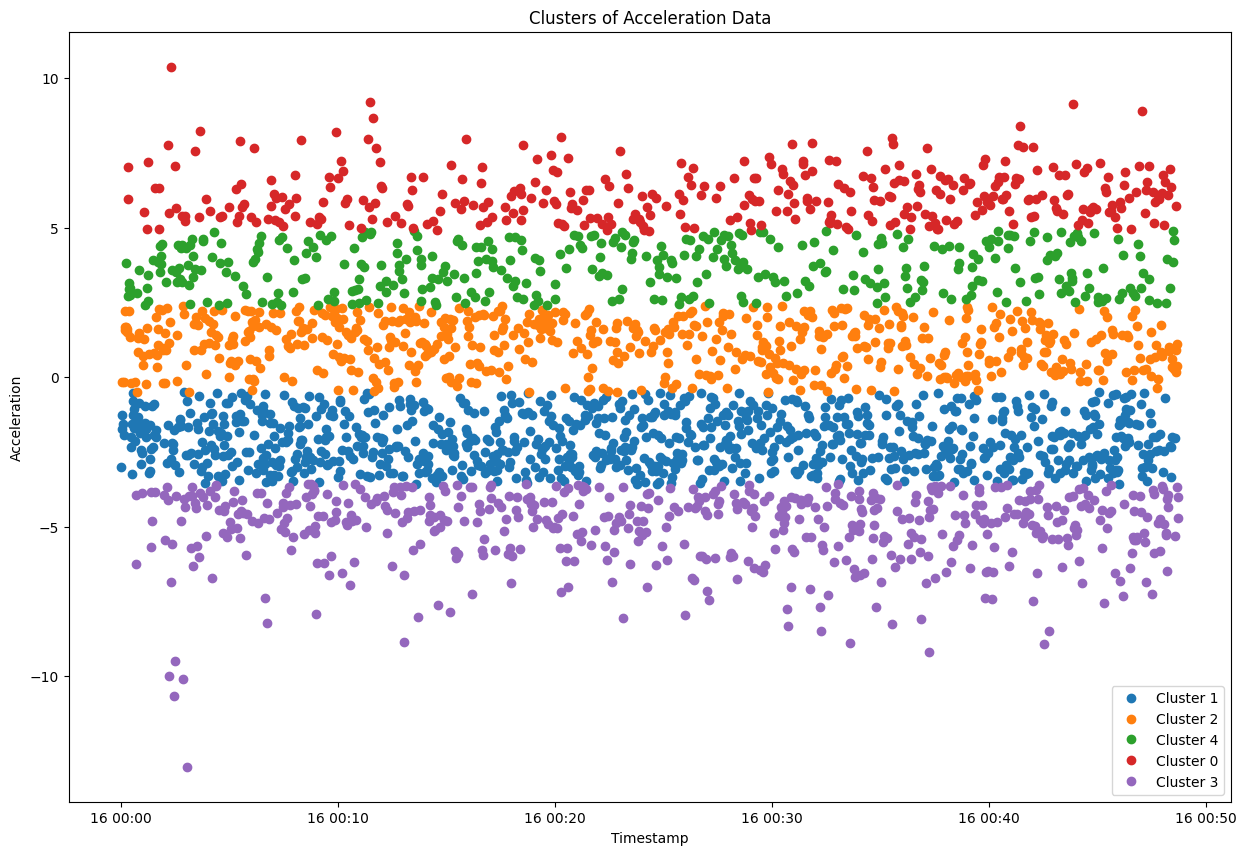

In [66]:

# Plotting the clusters
fig, ax = plt.subplots(figsize=(15, 10))
for cluster in df['Cluster'].unique():
    plt.plot(df[df['Cluster'] == cluster].index, df[df['Cluster'] == cluster]['Filtered x'], marker='o', linestyle='', label=f'Cluster {cluster}')

plt.legend()
plt.title('Clusters of Acceleration Data')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')
plt.show()

In [67]:
cluster_list=df['Cluster'].value_counts()
cluster_list.index

Index([1, 2, 3, 4, 0], dtype='int32', name='Cluster')

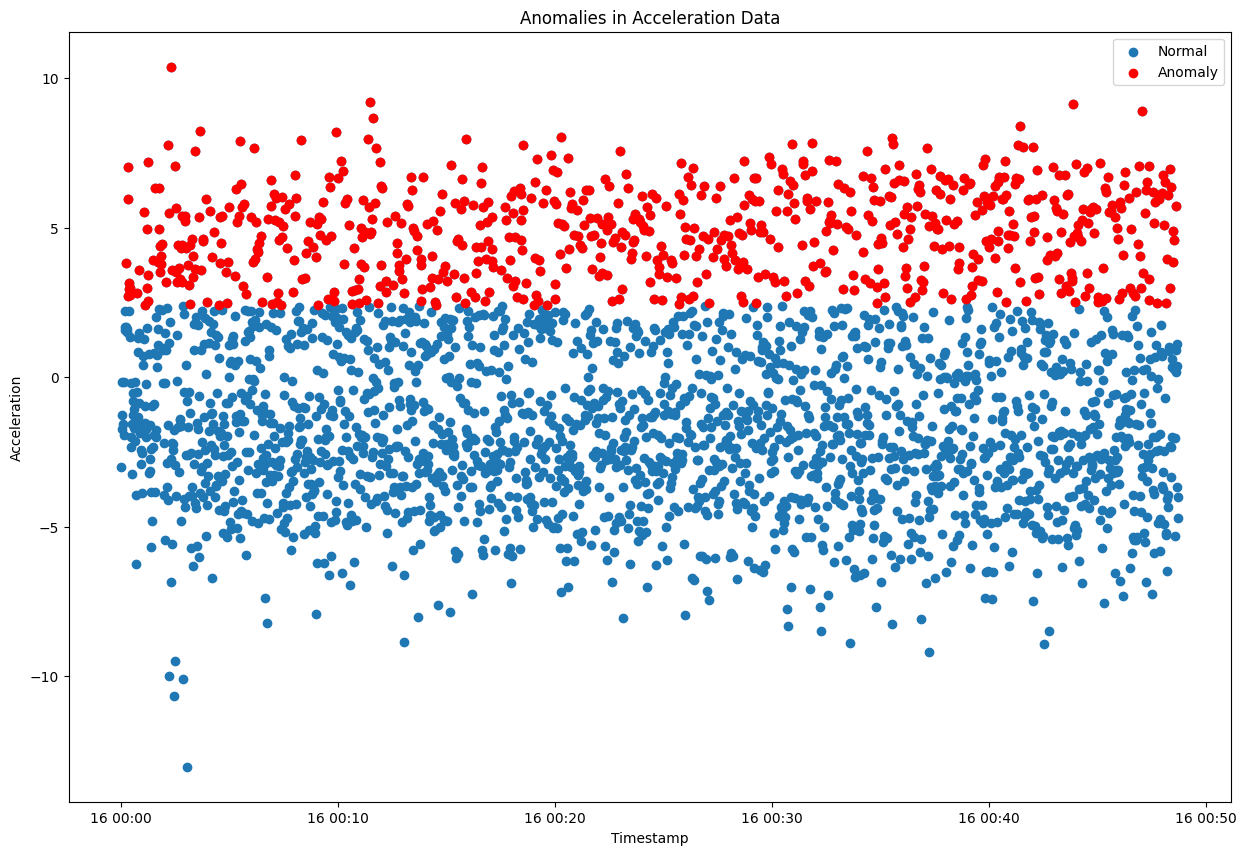

In [69]:

# Find the anomalies
anomalies = df[(df['Cluster'] == cluster_list.index[-1]) | (df['Cluster'] == cluster_list.index[-2]) ]

# Plot the anomalies
fig, ax = plt.subplots(figsize=(15, 10))
plt.scatter(df.index, df['Filtered x'], label='Normal')
plt.scatter(anomalies.index, anomalies['Filtered x'], label='Anomaly', color='r')
plt.legend()
plt.title('Anomalies in Acceleration Data')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')
plt.show()

In [ ]:
# Print the number of anomalies

healthy = df[~df.index.isin(anomalies.index)]
print(f'Number of anomalies: {len(anomalies)}')
print(f'Number of healthy data points: {len(healthy)}')
print(f'Percentage of anomalies: {len(anomalies) / len(df) * 100:.2f}%')